# This notebook is for Exploratory Data Analysis 

The code cell contains all the necessary imports for this file

In [1]:
'''Libraries for loading,manipulating and plotting data'''
import numpy as np    
import pandas as pd   
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import randint
'''Libraries for Working with Text Data'''
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob 
import re 


file_name = "../reddit_flair_data (1).csv"
%matplotlib inline

We load in the reddit_flair_data.csv file and have a look at the first 5 samples of it

In [2]:
df = pd.read_csv(file_name)
df.head()

id     flair                                              title  \
0  fwjdqr  AskIndia  4 days ago we had pending orders of 100 millio...   
1  fizkkk  AskIndia  randians who were big time users of dating app...   
2  f25vx0  AskIndia  what does r india thinks about the flat earthers    
3  dtvliq  AskIndia  people who left their 9 to 5 jobs to pursue a ...   
4  b7pvwt  AskIndia   somebody want to kill my full family what to do    

                                                body  num_cmnts  \
0   we are getting frantic calls from our pharma ...          6   
1  i d my own stint with these apps a couple of m...         19   
2  i encountered a foreigner in ig who says round...         31   
3  couldn t add askindia flair from the mobile br...         34   
4  it s now 24hrs but local police station is not...         24   

               created  score  \
0  2020-04-07 20:07:04     96   
1  2020-03-15 18:48:06     20   
2  2020-02-11 17:10:55      7   
3  2019-11-09 20:57:35     43   
4  2019-04-01 01:00:35     96   

                                            comments  \
0   modi has stockholm syndrome to be fair the ev...   
1   someone matched with me just to tell me that ...   
2   i haven t found a indian yet who believes ear...   
3   an engineer doing advertisement shoots since ...   
4   calm down go to the sp office of your town fi...   

                                                 url  
0  https://www.reddit.com/r/india/comments/fwjdqr...  
1  https://www.reddit.com/r/india/comments/fizkkk...  
2  https://www.reddit.com/r/india/comments/f25vx0...  
3  https://www.reddit.com/r/india/comments/dtvliq...  
4  https://www.reddit.com/r/india/comments/b7pvwt...

Here I combined all the text from the title,body and comments as a single entity to work on their combinations

In [3]:
def combined_features(df):
    '''
    takes in the dataframe object and returns the new dataframe which has the column of combined features
    '''
    combined = ' '
    combined_list=[]
    titles = list(df['title'])
    bodys = list(df['body'])
    comments = list(df['comments'])
    for i in range(len(titles)):
        combined = re.sub('[0-9]','',combined + str(titles[i]) + str(bodys[i]) + str(comments[i]))
        combined_list.append(combined)
        combined = ' ' 
    df['combined_features'] = combined_list
    return df

flairs = [
    'AskIndia','Non-Political','Scheduled','Photography','Coronavirus',
    'Science/Technology','Politics','Business/Finance','Policy/Economy','Sports','Food'
]

flairs_dict = {}
i=0
for flair in flairs:
    flairs_dict[flair] = i
    i+=1

    
df = combined_features(df)
df['label'] = df['flair'].apply(lambda x: flairs_dict[x])

In [4]:
df.head()

id     flair                                              title  \
0  fwjdqr  AskIndia  4 days ago we had pending orders of 100 millio...   
1  fizkkk  AskIndia  randians who were big time users of dating app...   
2  f25vx0  AskIndia  what does r india thinks about the flat earthers    
3  dtvliq  AskIndia  people who left their 9 to 5 jobs to pursue a ...   
4  b7pvwt  AskIndia   somebody want to kill my full family what to do    

                                                body  num_cmnts  \
0   we are getting frantic calls from our pharma ...          6   
1  i d my own stint with these apps a couple of m...         19   
2  i encountered a foreigner in ig who says round...         31   
3  couldn t add askindia flair from the mobile br...         34   
4  it s now 24hrs but local police station is not...         24   

               created  score  \
0  2020-04-07 20:07:04     96   
1  2020-03-15 18:48:06     20   
2  2020-02-11 17:10:55      7   
3  2019-11-09 20:57:35     43   
4  2019-04-01 01:00:35     96   

                                            comments  \
0   modi has stockholm syndrome to be fair the ev...   
1   someone matched with me just to tell me that ...   
2   i haven t found a indian yet who believes ear...   
3   an engineer doing advertisement shoots since ...   
4   calm down go to the sp office of your town fi...   

                                                 url  \
0  https://www.reddit.com/r/india/comments/fwjdqr...   
1  https://www.reddit.com/r/india/comments/fizkkk...   
2  https://www.reddit.com/r/india/comments/f25vx0...   
3  https://www.reddit.com/r/india/comments/dtvliq...   
4  https://www.reddit.com/r/india/comments/b7pvwt...   

                                   combined_features  label  
0    days ago we had pending orders of  million h...      0  
1   randians who were big time users of dating ap...      0  
2   what does r india thinks about the flat earth...      0  
3   people who left their  to  jobs to pursue a c...      0  
4   somebody want to kill my full family what to ...      0

Applying Tokenization and removing stopwords

In [5]:
stop_words = set(stopwords.words('english'))
df['tokenized'] = df['combined_features'].apply(word_tokenize)
df['stopwords_removed'] = df['tokenized'].apply(lambda x: ' '.join(word for word in x if word not in stop_words))

Also added the sentiment for the reddit post and the word count (for combination of each title,body,comments)

In [6]:
df['polarity'] = df['combined_features'].map(lambda text: TextBlob(text).sentiment.polarity)
df['word_count'] = df['combined_features'].apply(lambda x: len(str(x).split()))

In [7]:
df.head()

id     flair                                              title  \
0  fwjdqr  AskIndia  4 days ago we had pending orders of 100 millio...   
1  fizkkk  AskIndia  randians who were big time users of dating app...   
2  f25vx0  AskIndia  what does r india thinks about the flat earthers    
3  dtvliq  AskIndia  people who left their 9 to 5 jobs to pursue a ...   
4  b7pvwt  AskIndia   somebody want to kill my full family what to do    

                                                body  num_cmnts  \
0   we are getting frantic calls from our pharma ...          6   
1  i d my own stint with these apps a couple of m...         19   
2  i encountered a foreigner in ig who says round...         31   
3  couldn t add askindia flair from the mobile br...         34   
4  it s now 24hrs but local police station is not...         24   

               created  score  \
0  2020-04-07 20:07:04     96   
1  2020-03-15 18:48:06     20   
2  2020-02-11 17:10:55      7   
3  2019-11-09 20:57:35     43   
4  2019-04-01 01:00:35     96   

                                            comments  \
0   modi has stockholm syndrome to be fair the ev...   
1   someone matched with me just to tell me that ...   
2   i haven t found a indian yet who believes ear...   
3   an engineer doing advertisement shoots since ...   
4   calm down go to the sp office of your town fi...   

                                                 url  \
0  https://www.reddit.com/r/india/comments/fwjdqr...   
1  https://www.reddit.com/r/india/comments/fizkkk...   
2  https://www.reddit.com/r/india/comments/f25vx0...   
3  https://www.reddit.com/r/india/comments/dtvliq...   
4  https://www.reddit.com/r/india/comments/b7pvwt...   

                                   combined_features  label  \
0    days ago we had pending orders of  million h...      0   
1   randians who were big time users of dating ap...      0   
2   what does r india thinks about the flat earth...      0   
3   people who left their  to  jobs to pursue a c...      0   
4   somebody want to kill my full family what to ...      0   

                                           tokenized  \
0  [days, ago, we, had, pending, orders, of, mill...   
1  [randians, who, were, big, time, users, of, da...   
2  [what, does, r, india, thinks, about, the, fla...   
3  [people, who, left, their, to, jobs, to, pursu...   
4  [somebody, want, to, kill, my, full, family, w...   

                                   stopwords_removed  polarity  word_count  
0  days ago pending orders million hydroxychloroq...  0.146789         410  
1  randians big time users dating apps like tinde...  0.103643         523  
2  r india thinks flat earthers encountered forei... -0.029832         356  
3  people left jobs pursue career music art forms...  0.181008         456  
4  somebody want kill full family hrs local polic...  0.012874         291

Let's see the distribution of each label(flair) in the dataset

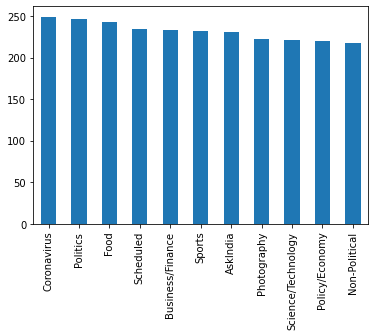

In [8]:
df['flair'].value_counts().plot(kind='bar')

Looking at the highest and lowest polarity scores

In [9]:
print(df.polarity.max())
print(df.polarity.min())

1.0
-0.875


Plotting the Histogram of the polarity score

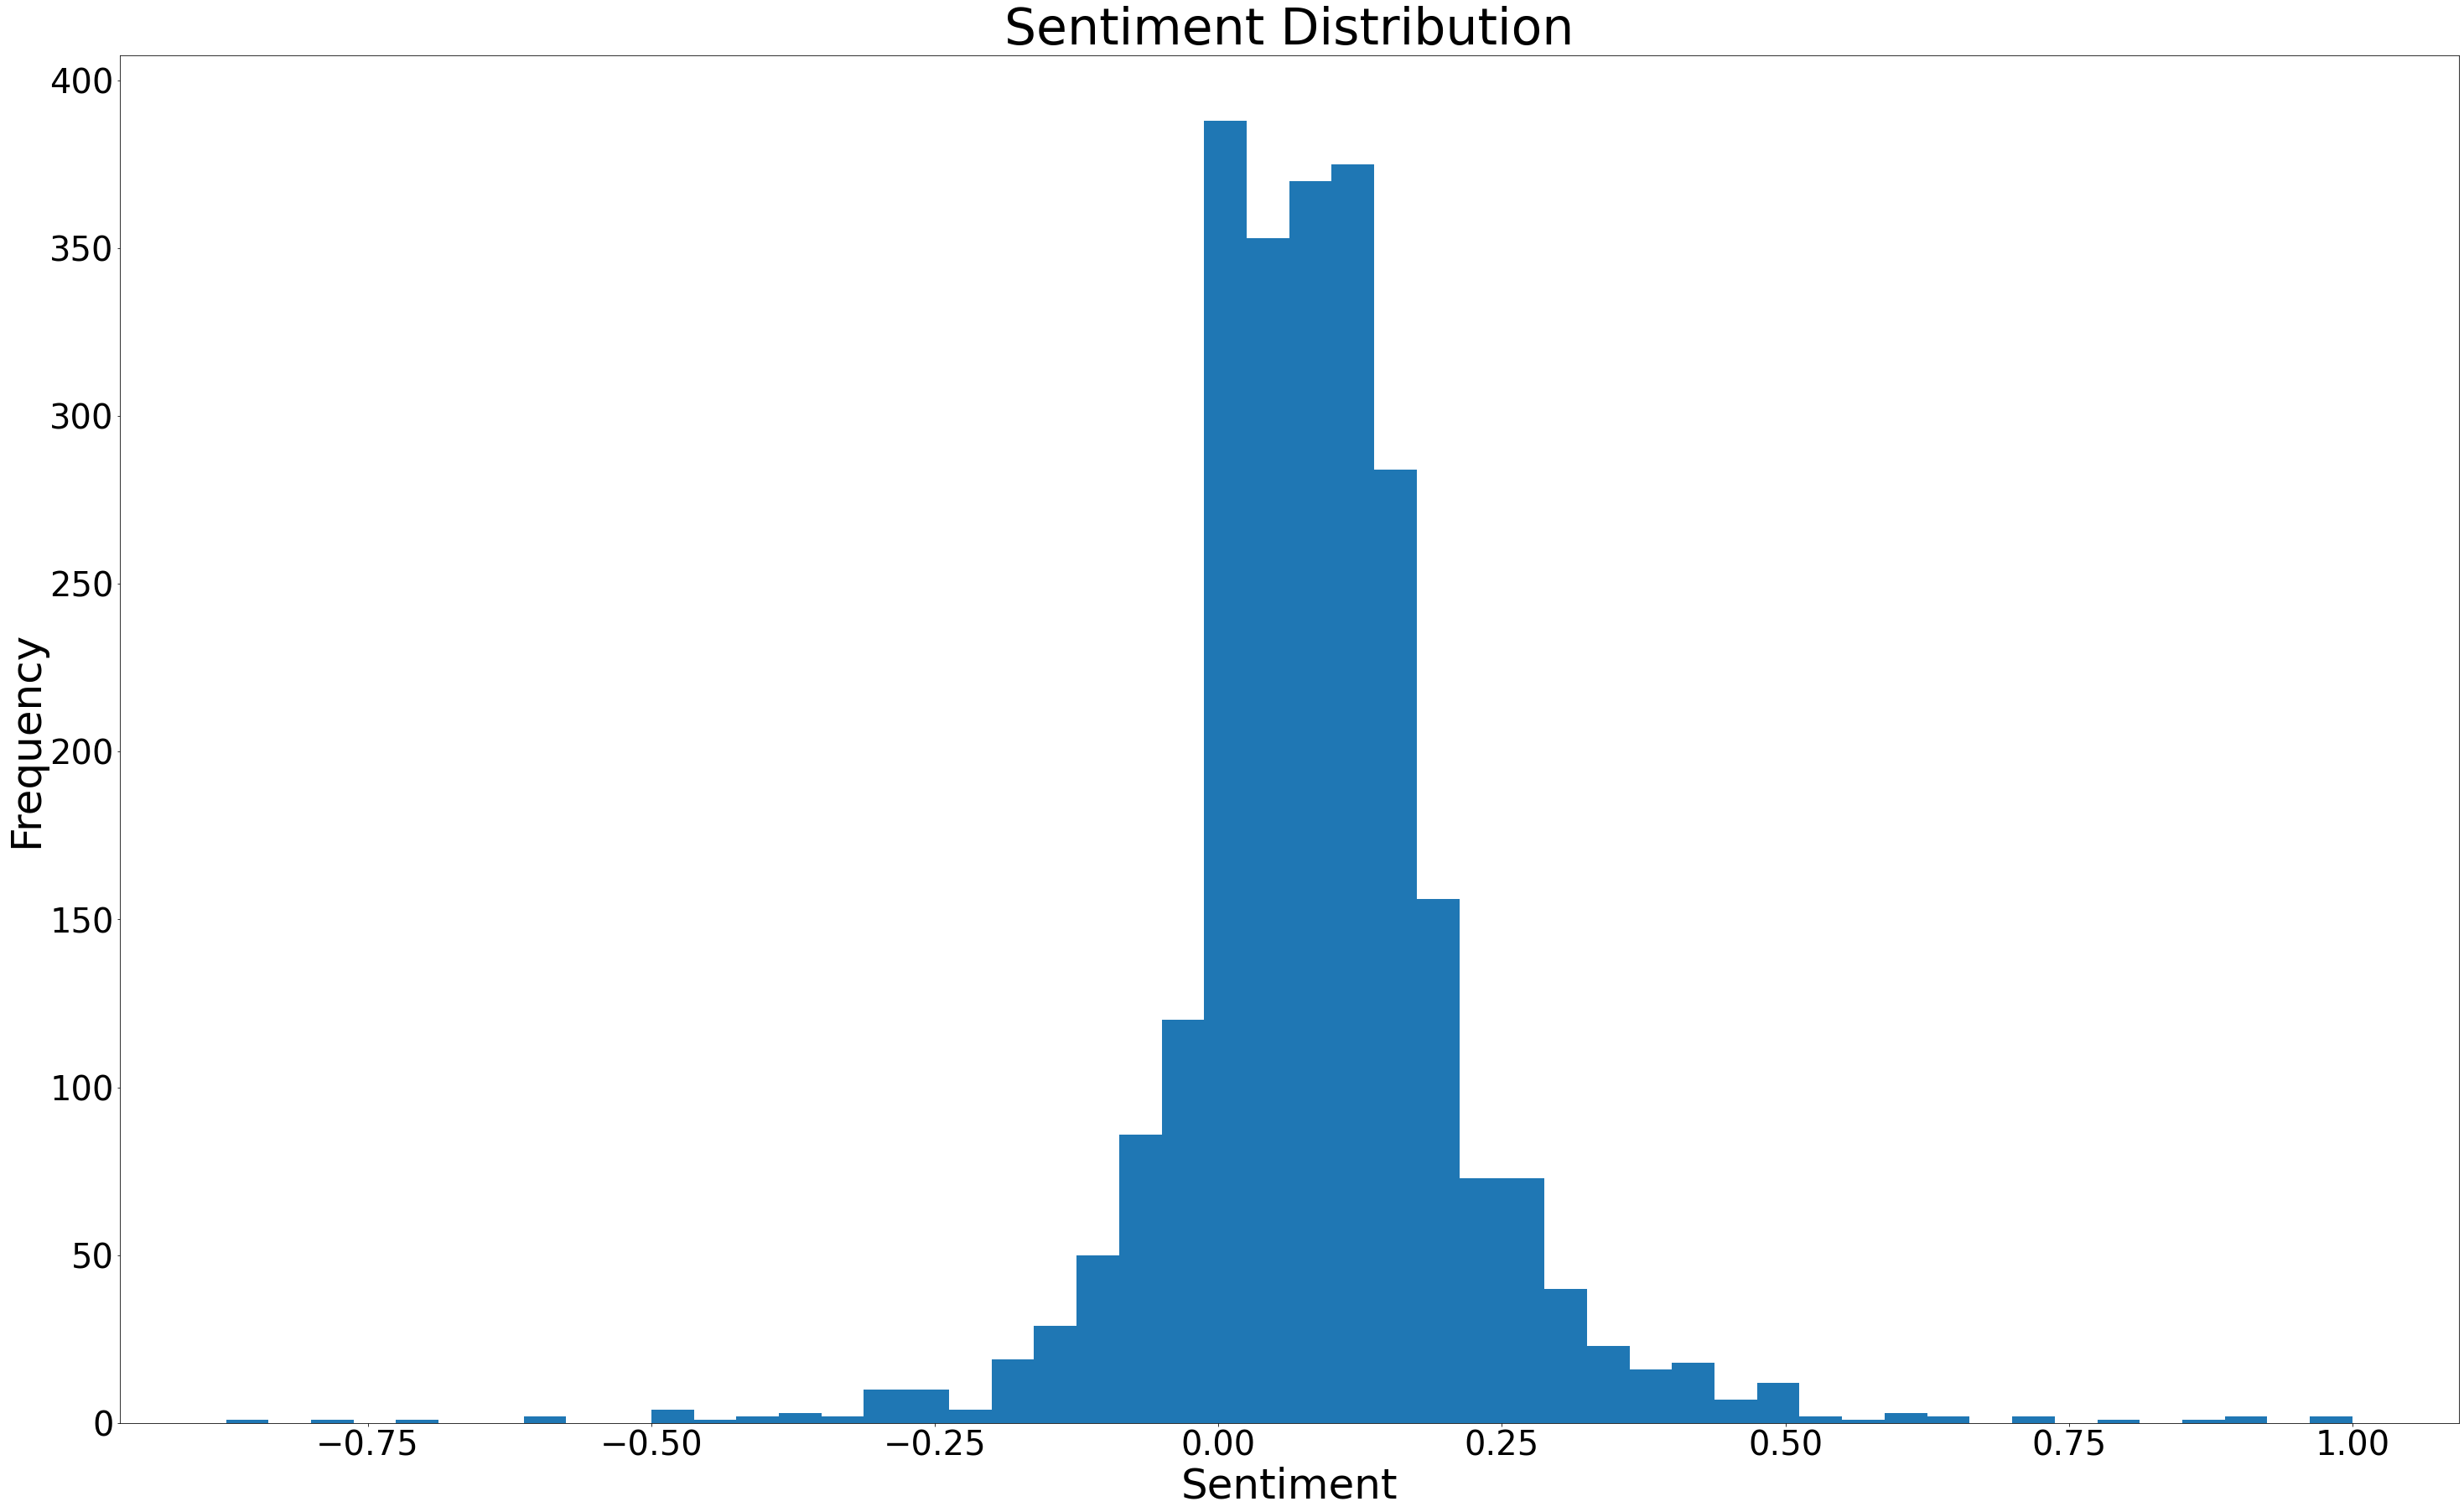

'Vast majority of the sentiment polarity scores are >0, means most of them are positive'

In [10]:
plt.figure(figsize=(50,30))
plt.xlabel('Sentiment',fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['polarity'],bins=50)
plt.title('Sentiment Distribution',fontsize=60)
plt.show()

'''Vast majority of the sentiment polarity scores are >0, means most of them are positive'''

Plotting the Histogram of the Scores

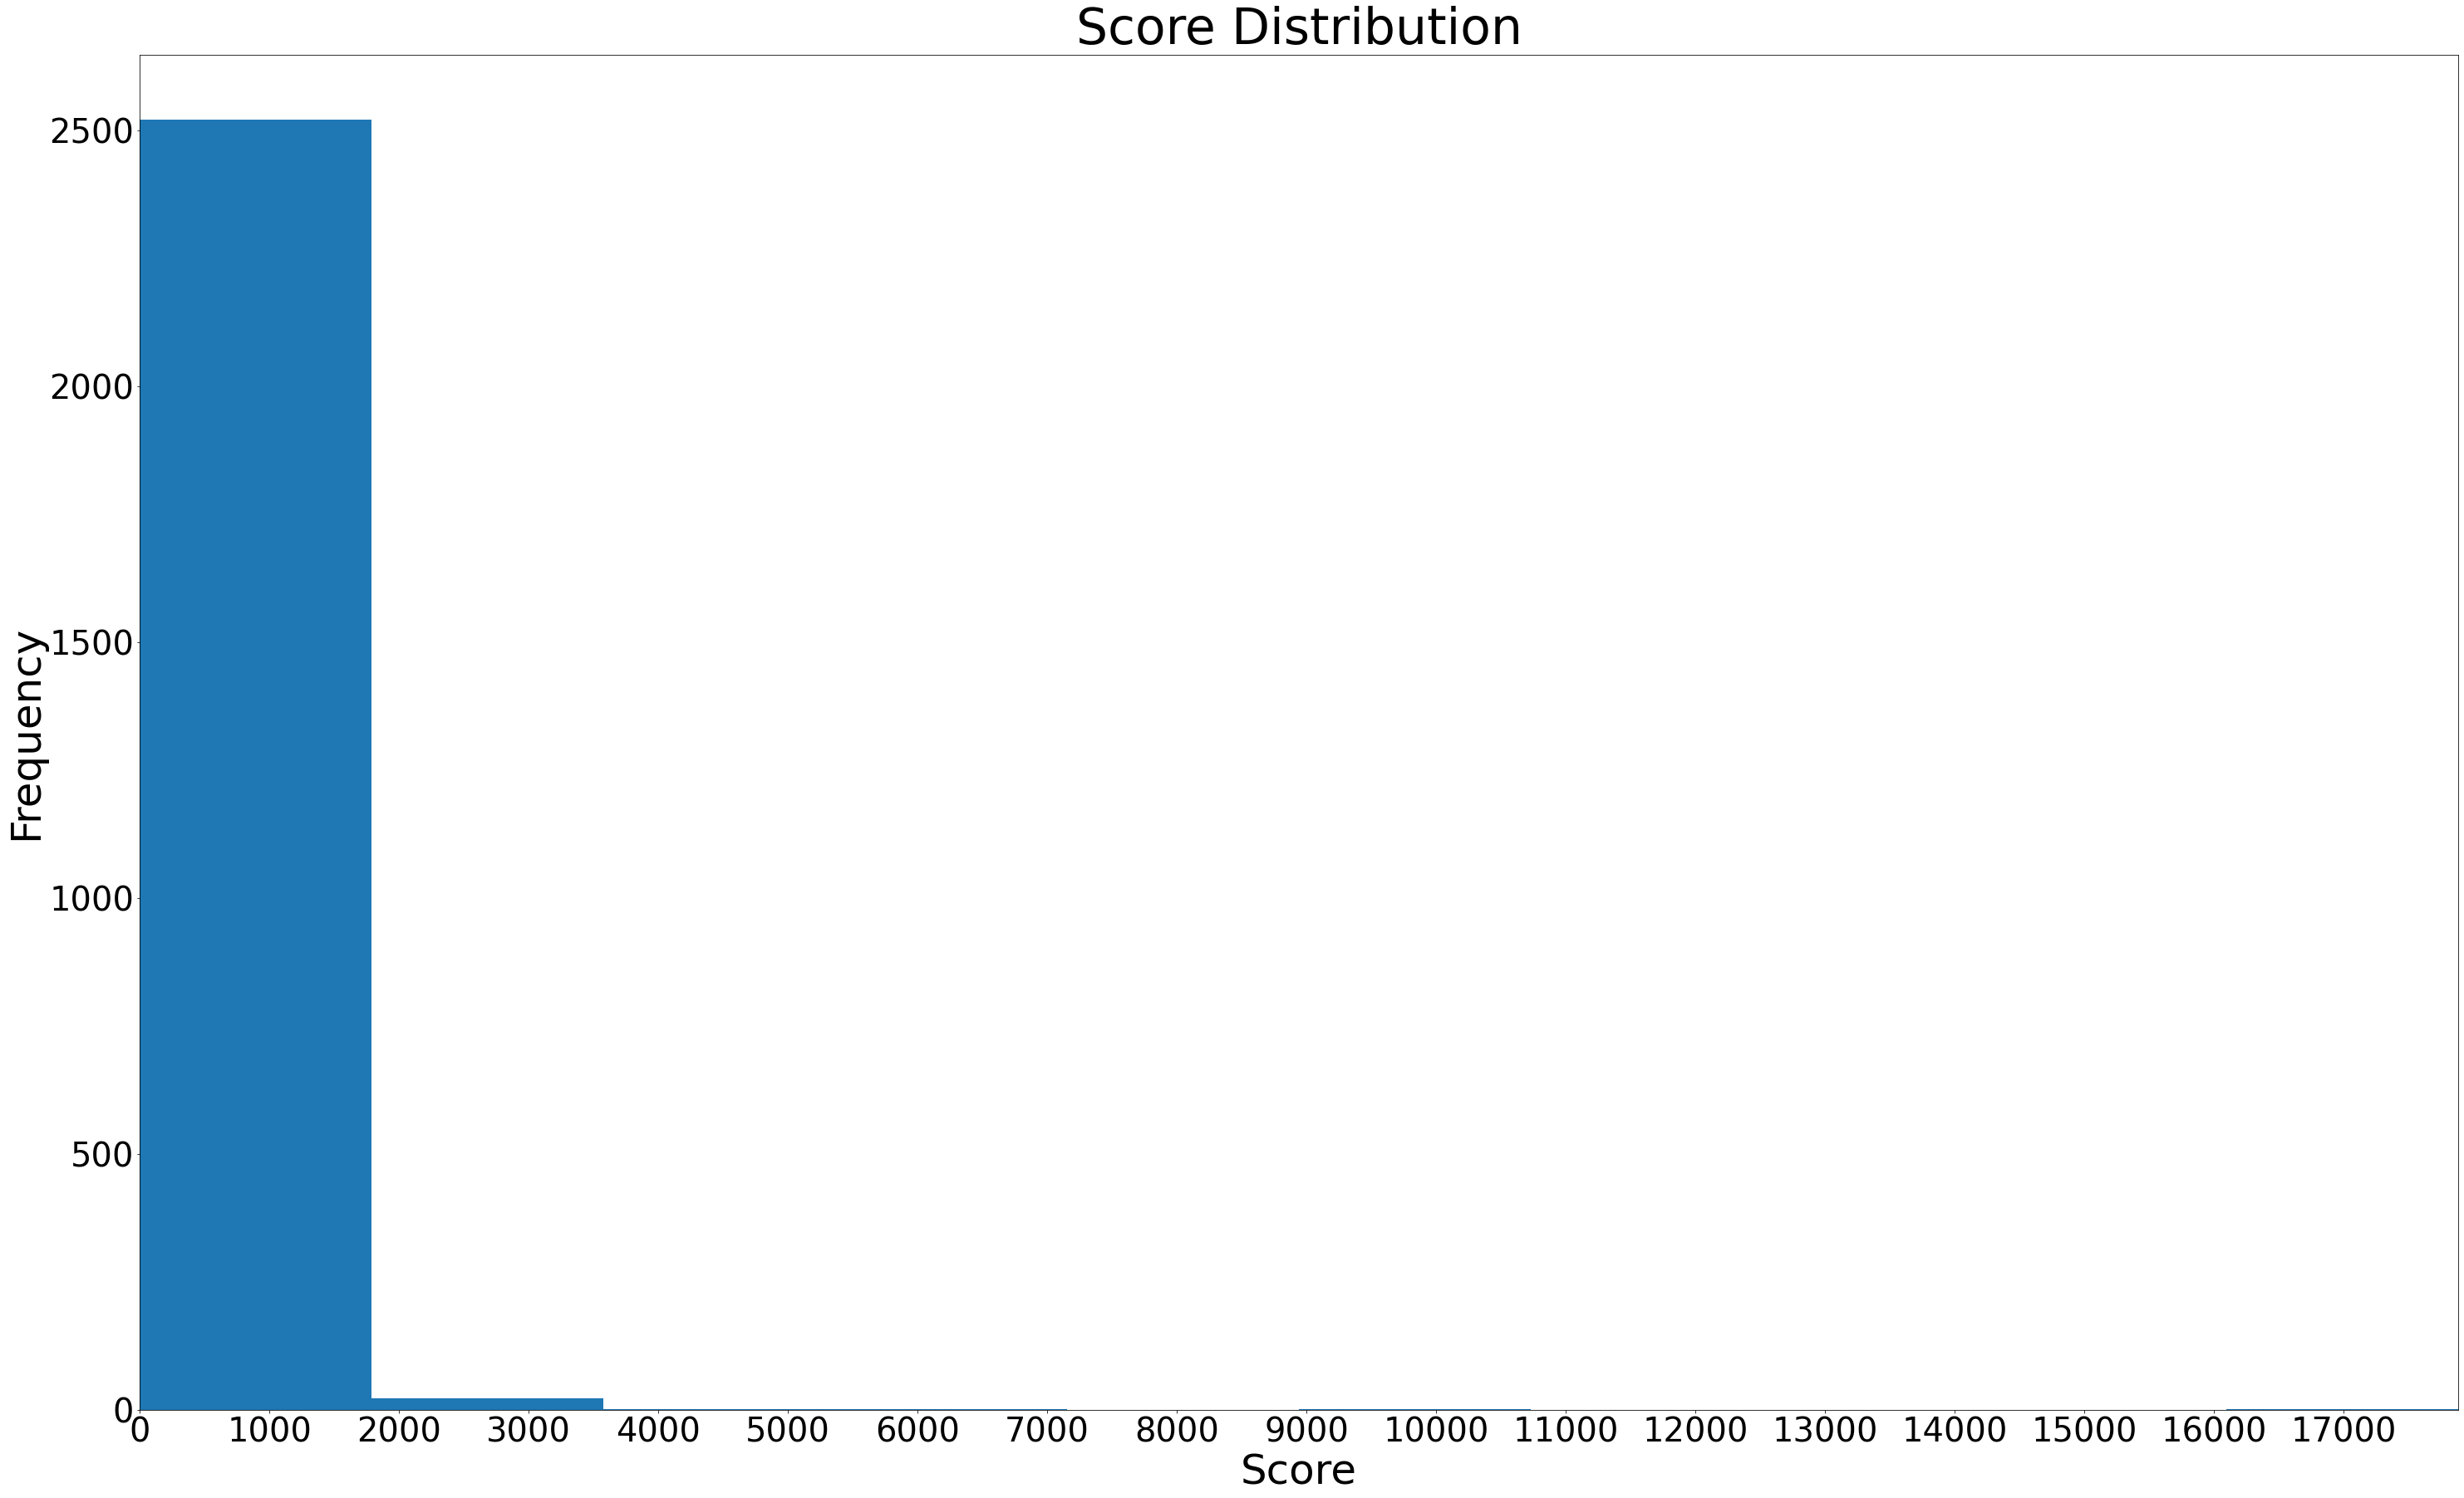

Max score is 17886 and Min score is 0


'Majority of scores are <2500 with traces > 2500 '

In [11]:
plt.figure(figsize=(50,30))
plt.xlabel('Score',fontsize=50)
plt.xlim([0, df.score.max()])
plt.xticks(np.arange(0, df.score.max(), 1000))
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['score'],bins=10)
plt.title('Score Distribution',fontsize=60)
plt.show()

print('Max score is {max_score} and Min score is {min_score}'.format(max_score=df.score.max(),min_score = df.score.min()))
'''Majority of scores are <2500 with traces > 2500 '''

Plotting the Histogram of the No of Comments

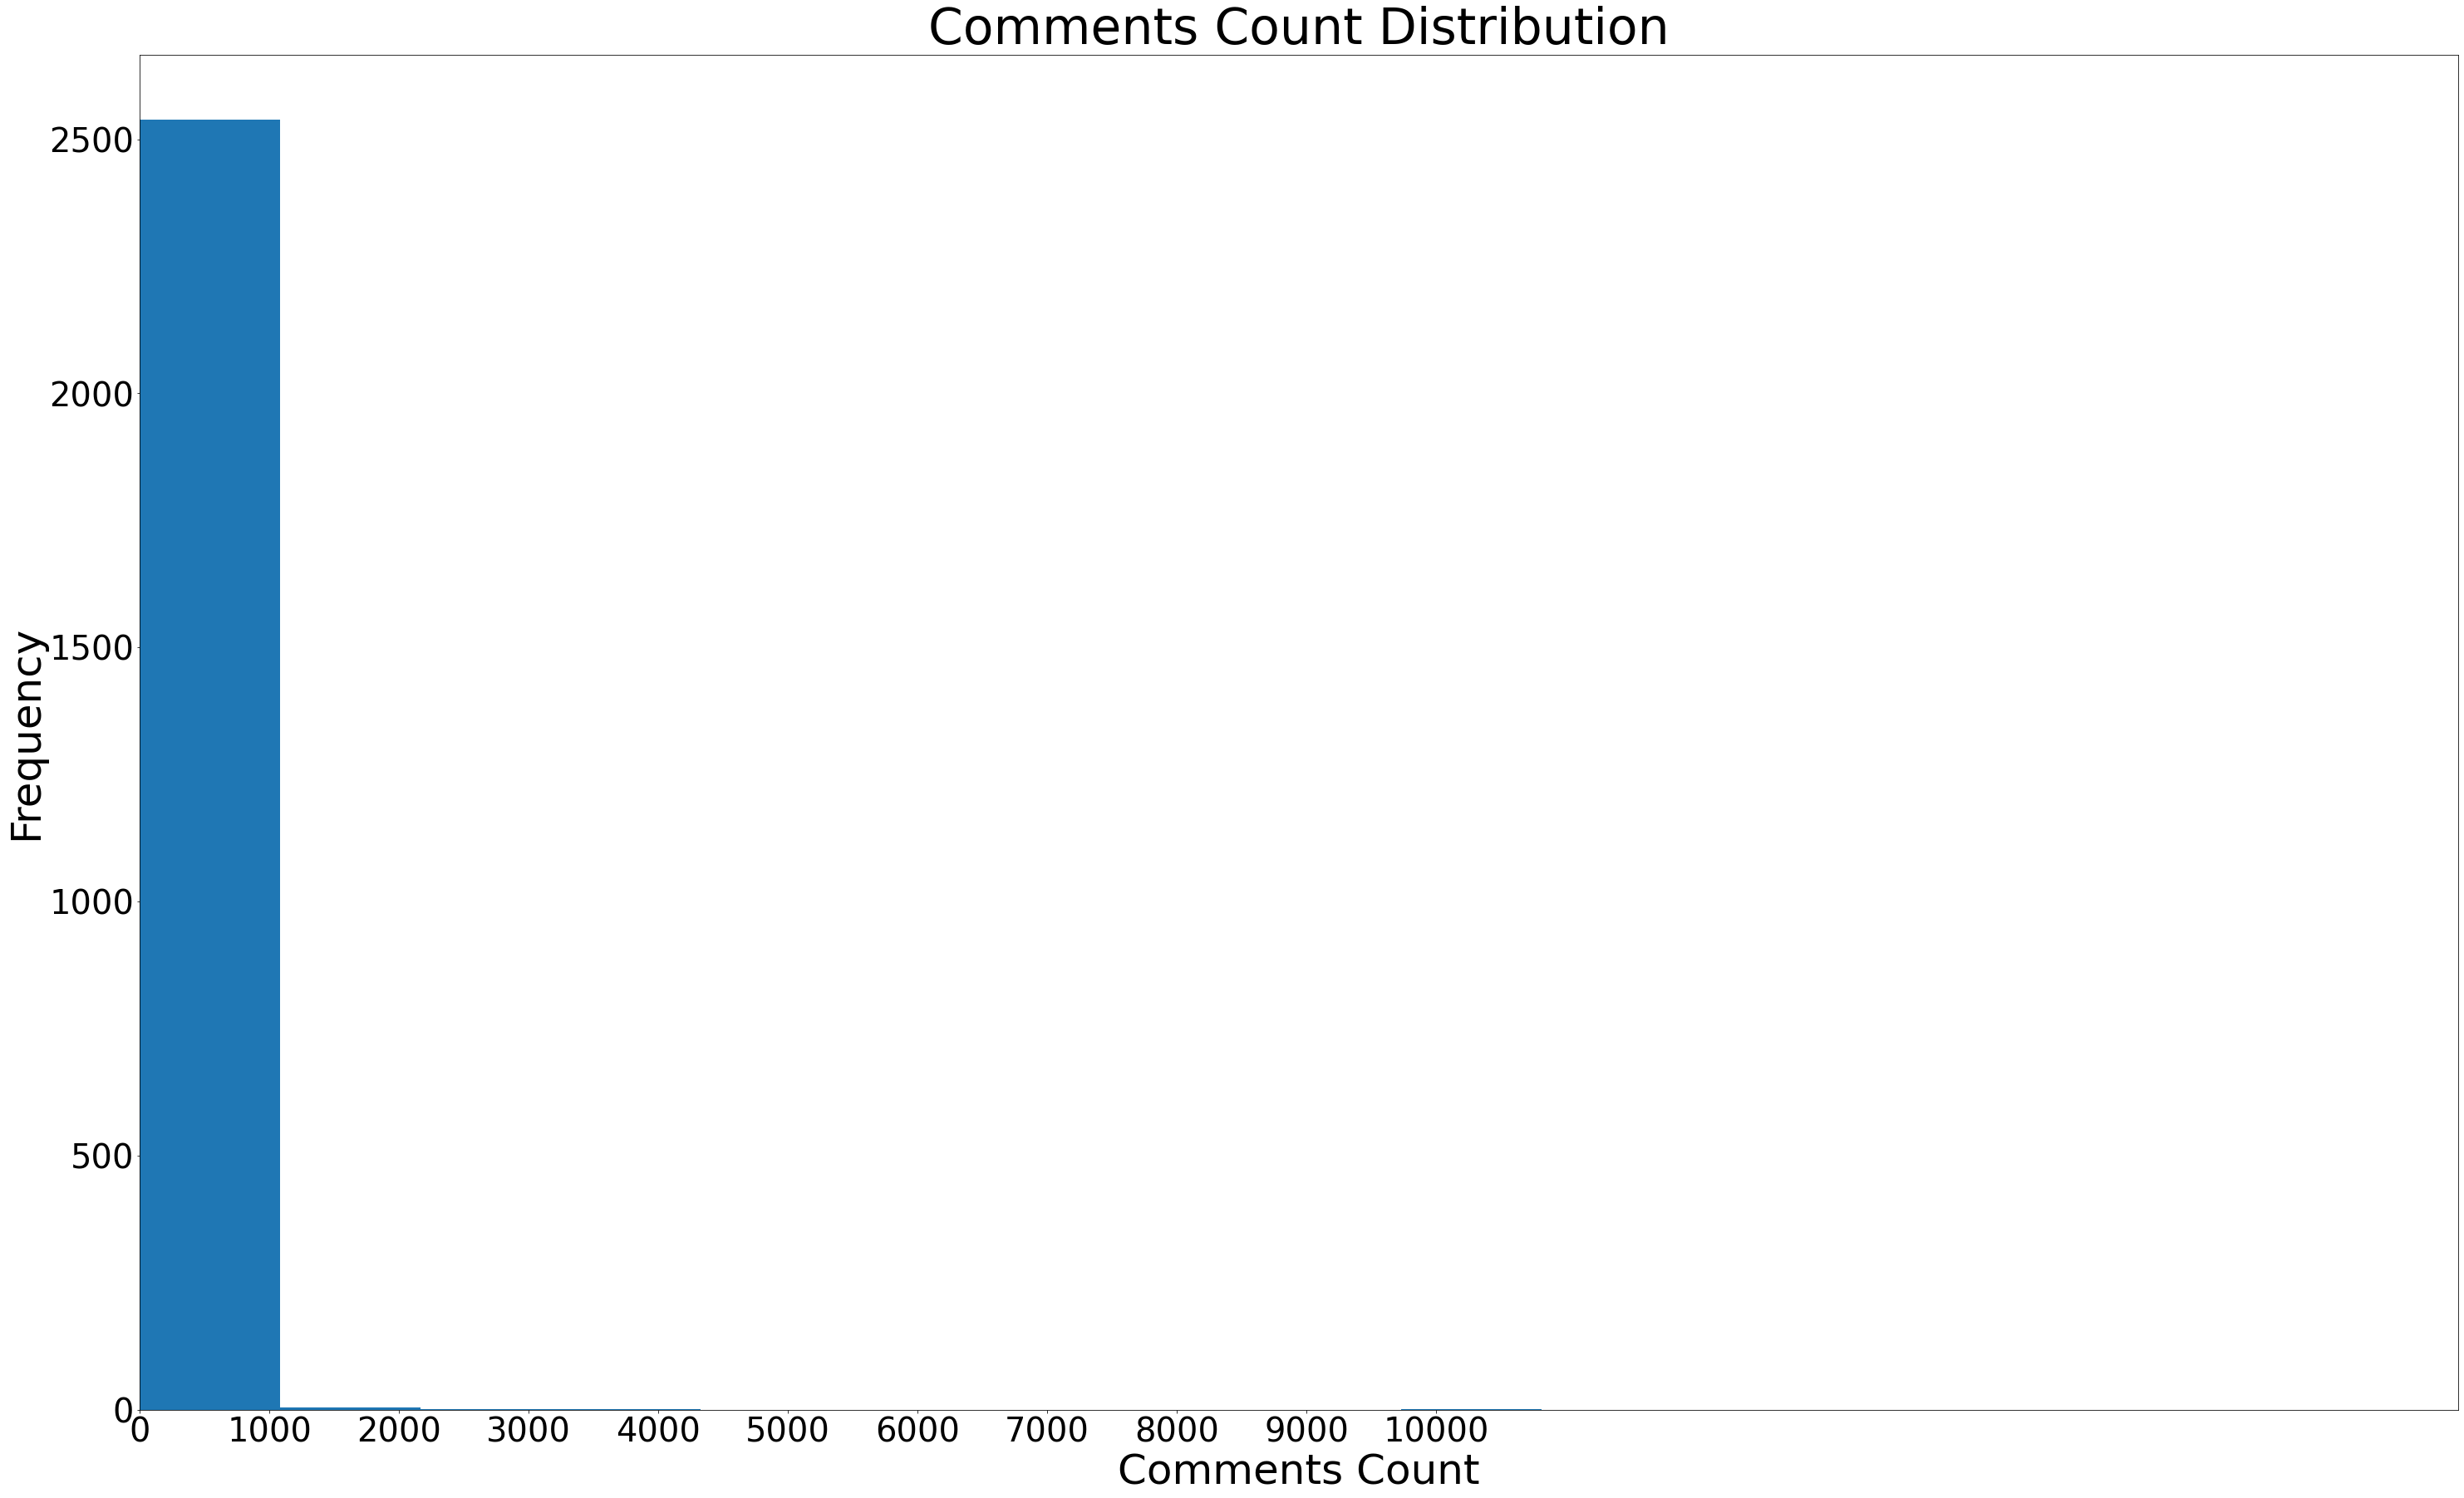

'Vast majority of the reddit posts have <1000 comments'

In [12]:
plt.figure(figsize=(50,30))
plt.xlabel('Comments Count',fontsize=50)
plt.xlim([0, df.score.max()])
plt.xticks(np.arange(0, df.num_cmnts.max(), 1000))
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['num_cmnts'],bins=10,align='mid')
plt.title('Comments Count Distribution',fontsize=60)
plt.show()

'''Vast majority of the reddit posts have <1000 comments'''

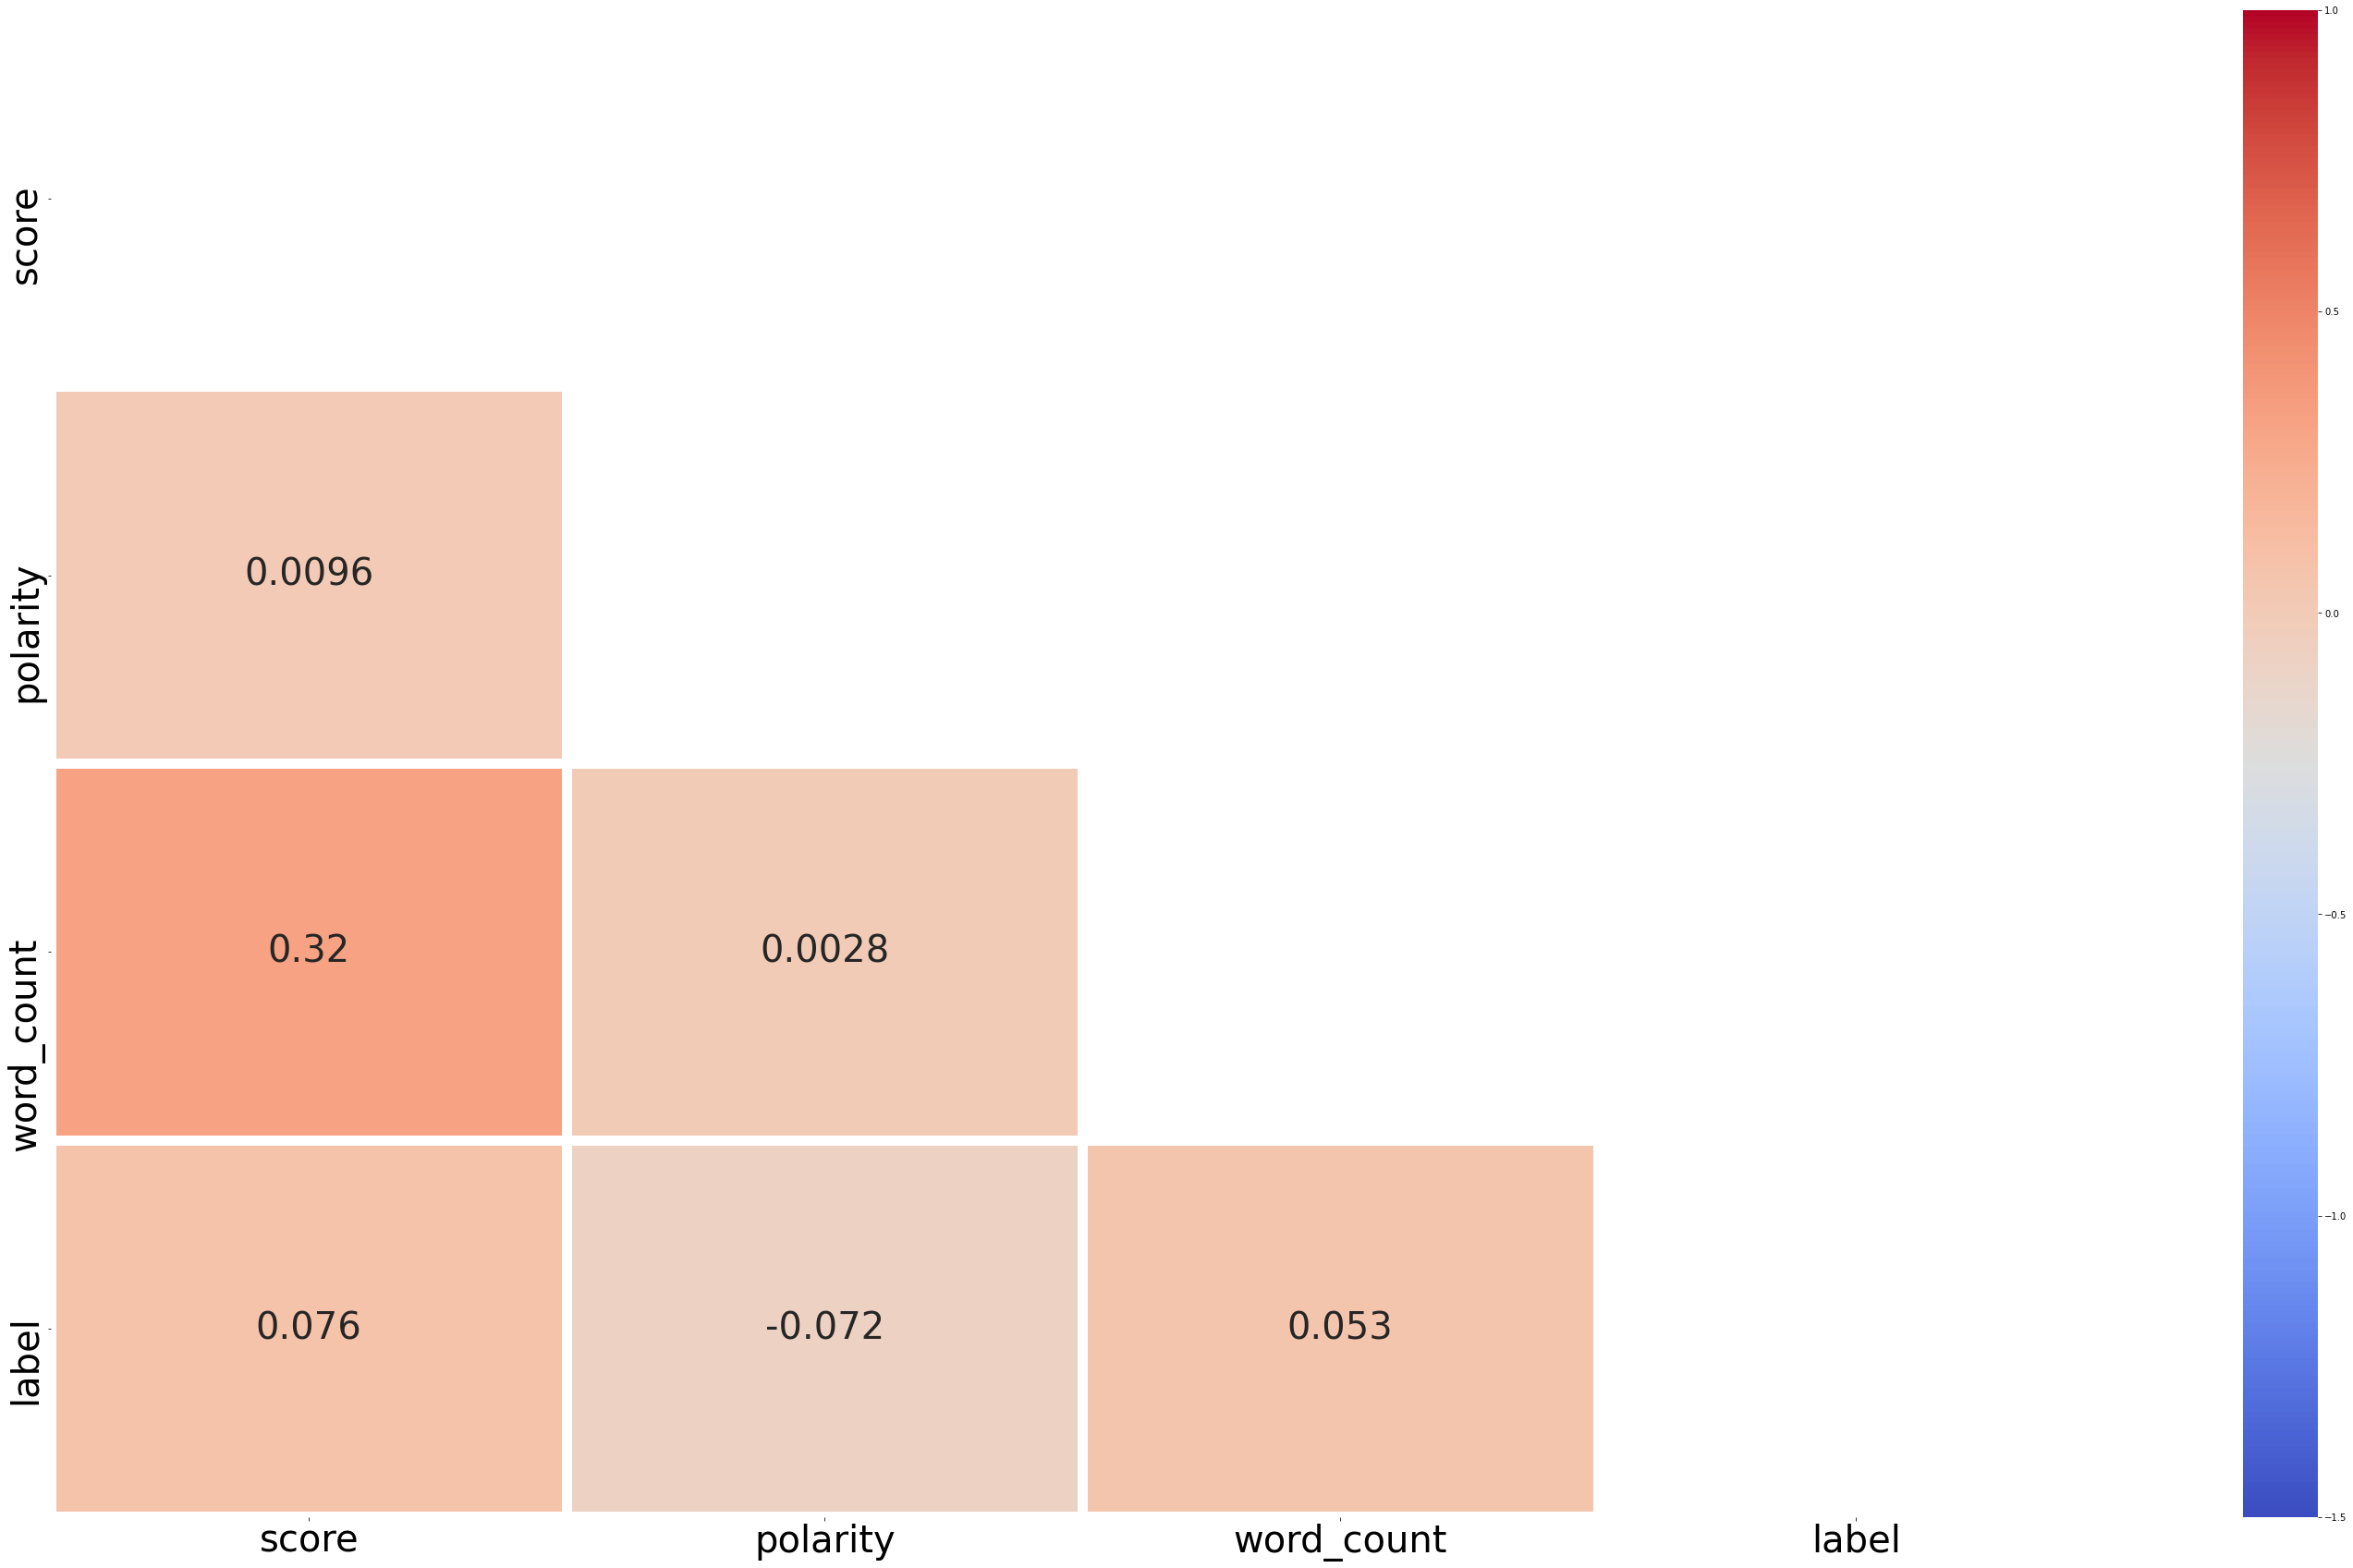

In [13]:
correlation = df[['score','polarity','word_count','label']].corr()
mask = np.zeros_like(correlation,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation,cmap='coolwarm',annot=True,annot_kws={'size':40},linewidths=10,vmin=-1.5,mask=mask)

Analysing the word clouds and the most common words in the reddit posts+comments

In [14]:
stopwords = set(STOPWORDS)
def makeWordCloud(textList,stopwords):
    '''
    This function is used to make a wordcloud. 
    It takes two argument one is the list of the texts whose word cloud is to be seen and second is the list of stopwords
    We will use it to see all the words in different flairs
    '''
    words  =' '
    for val in textList: 
        #split each word in the sentences
        tokens = val.split() 
      
        # Convert each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        
        #appending words in string
        for word in tokens: 
            words = words + word + ' '
  
  
    wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    return wordcloud


In [15]:
wordCloudDict = {}

for flair in flairs:
    wordCloudDict[flair] = None
    
text_dict = wordCloudDict

for flair in flairs:
    rdf = df[df['flair']==flair]
    text_dict[flair] = list(rdf['stopwords_removed'])
    
for flair in flairs:
    wordCloudDict[flair] = makeWordCloud(text_dict[flair],stopwords)

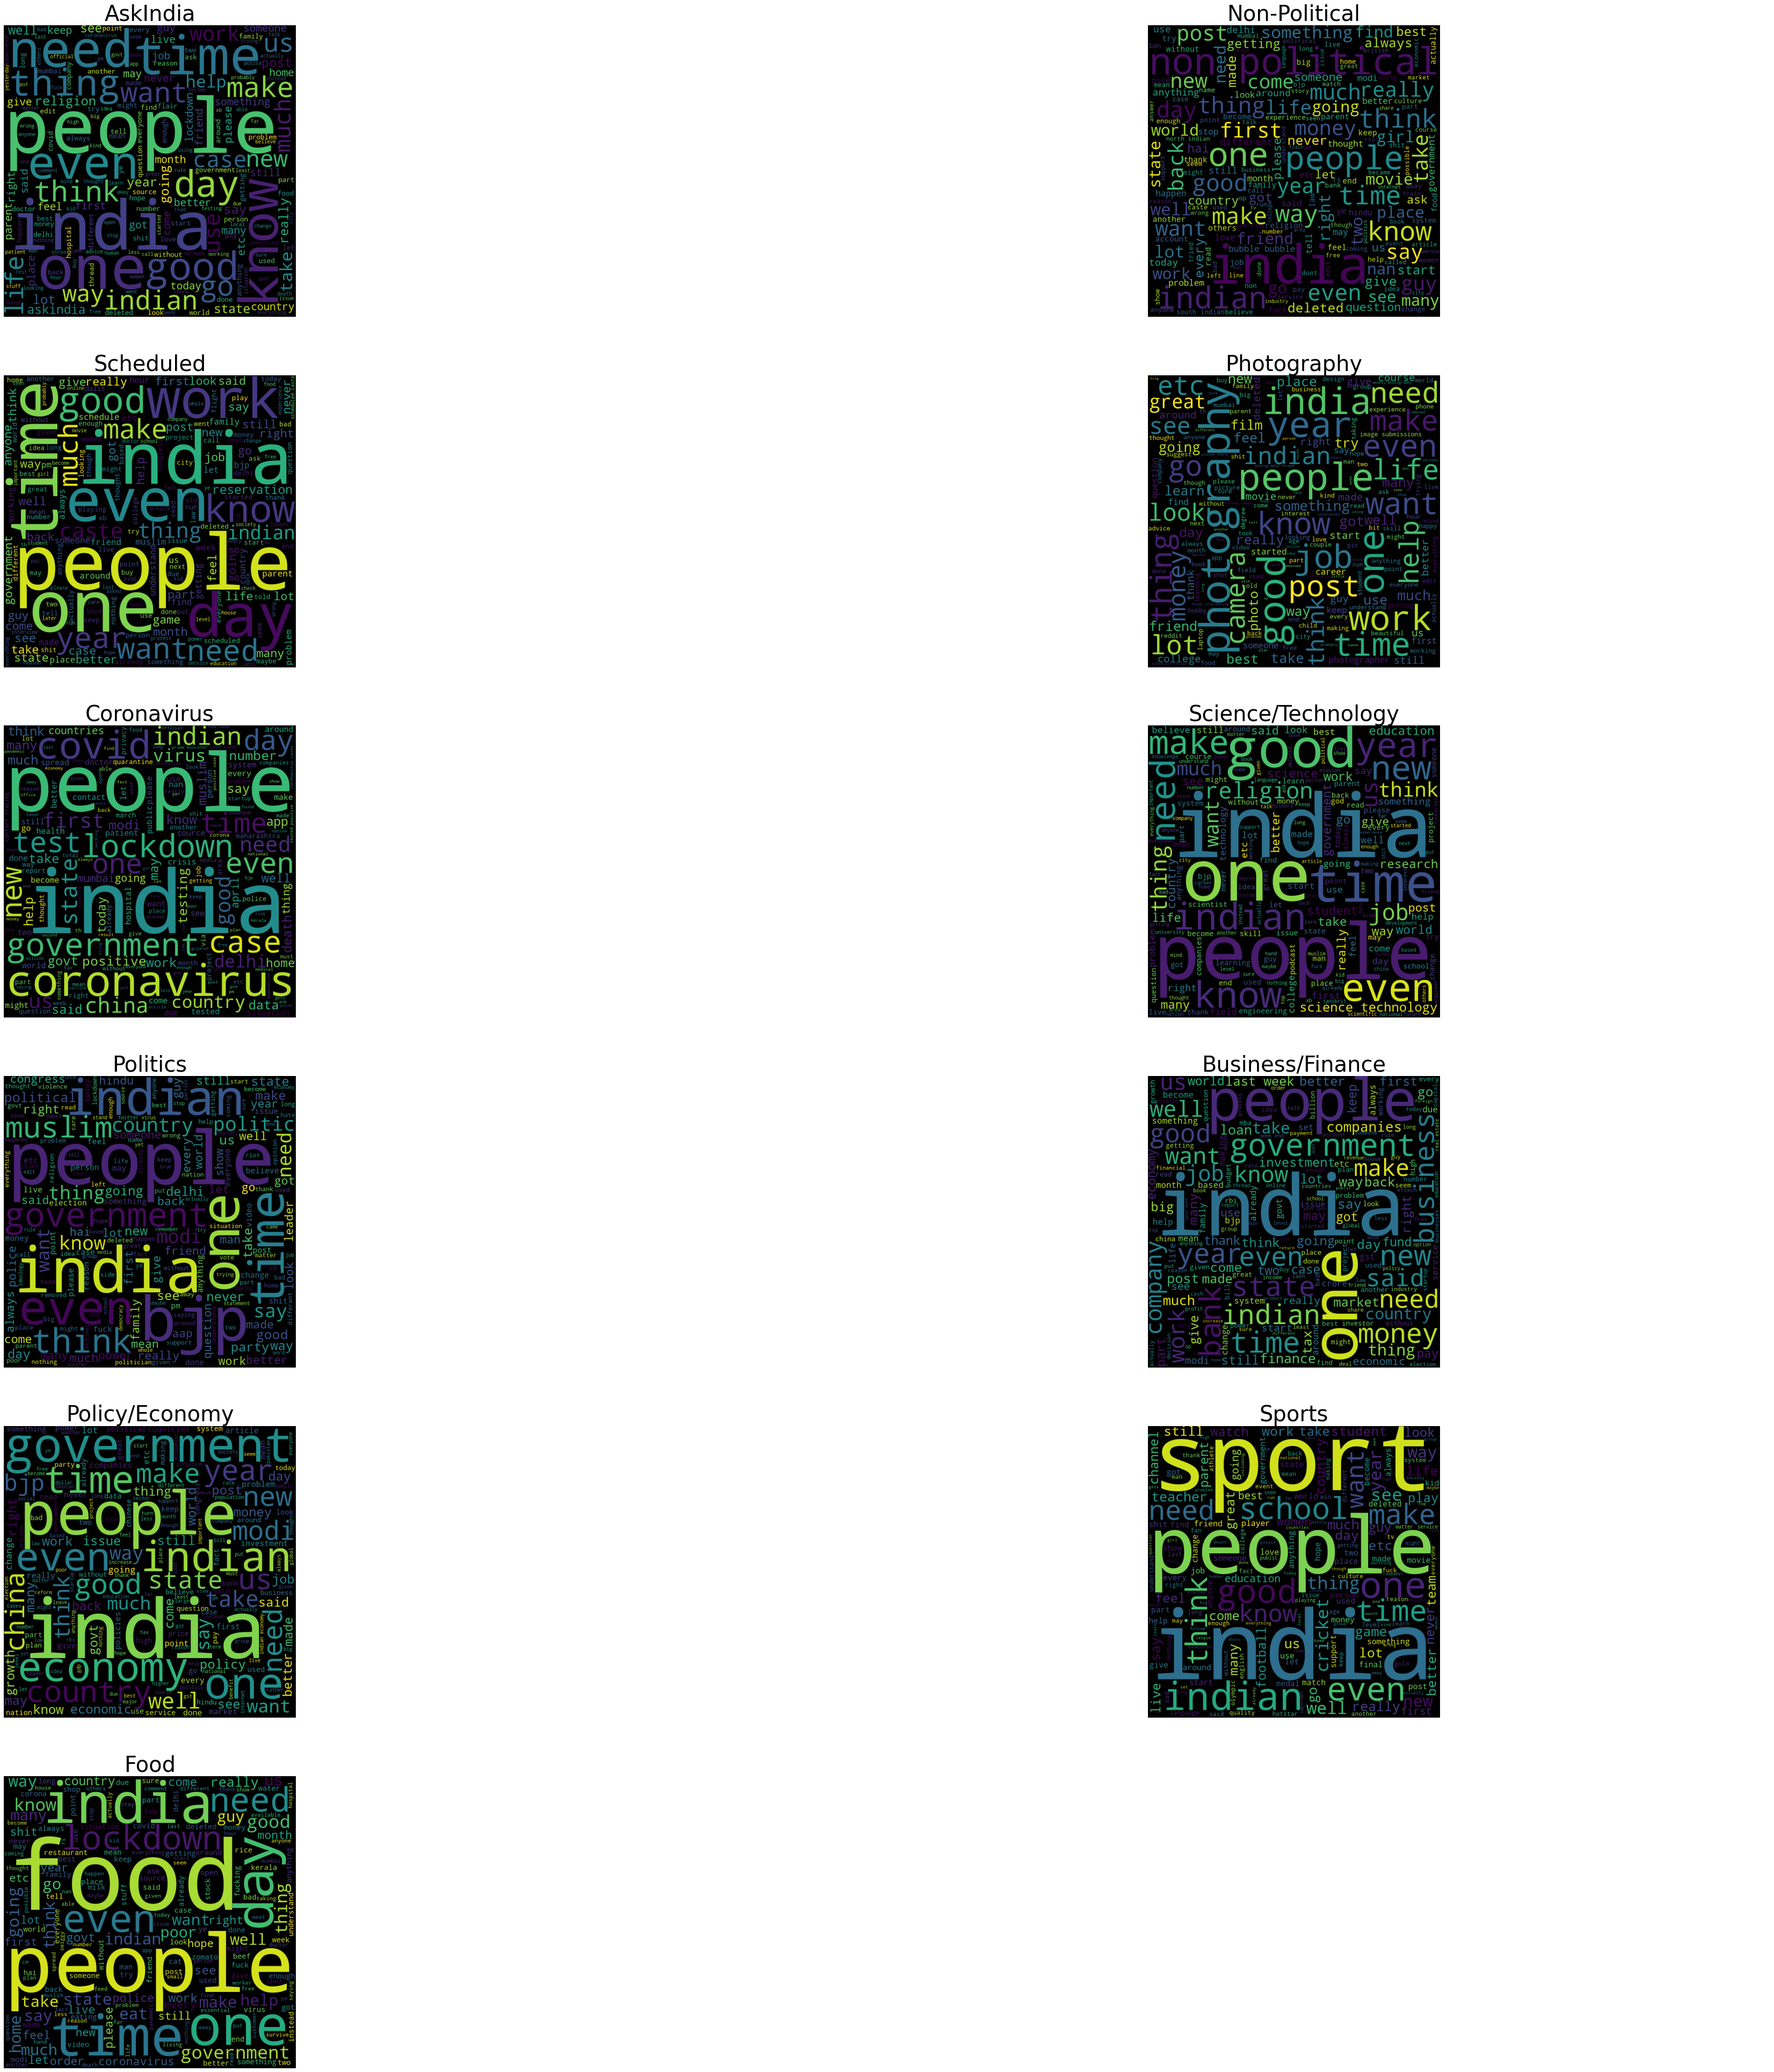

In [16]:
fig,axes = plt.subplots(6,2,figsize=(70,70))
plt.axis('off')
for i in range(11):
        if i%2==0:
            axes[int(i/2),0].imshow(wordCloudDict[flairs[i]])
            axes[int(i/2),0].set_title(flairs[i],fontsize=40)
            axes[int(i/2),0].set_axis_off()
        elif i%2==1:
            axes[int(i/2),1].imshow(wordCloudDict[flairs[i]])
            axes[int(i/2),1].set_title(flairs[i],fontsize=40)
            axes[int(i/2),1].set_axis_off()
fig.savefig("Results.png",dpi=400)

In [19]:
df.to_csv("../preprocessed_data.csv")

In [20]:
df.head()

id     flair                                              title  \
0  fwjdqr  AskIndia  4 days ago we had pending orders of 100 millio...   
1  fizkkk  AskIndia  randians who were big time users of dating app...   
2  f25vx0  AskIndia  what does r india thinks about the flat earthers    
3  dtvliq  AskIndia  people who left their 9 to 5 jobs to pursue a ...   
4  b7pvwt  AskIndia   somebody want to kill my full family what to do    

                                                body  num_cmnts  \
0   we are getting frantic calls from our pharma ...          6   
1  i d my own stint with these apps a couple of m...         19   
2  i encountered a foreigner in ig who says round...         31   
3  couldn t add askindia flair from the mobile br...         34   
4  it s now 24hrs but local police station is not...         24   

               created  score  \
0  2020-04-07 20:07:04     96   
1  2020-03-15 18:48:06     20   
2  2020-02-11 17:10:55      7   
3  2019-11-09 20:57:35     43   
4  2019-04-01 01:00:35     96   

                                            comments  \
0   modi has stockholm syndrome to be fair the ev...   
1   someone matched with me just to tell me that ...   
2   i haven t found a indian yet who believes ear...   
3   an engineer doing advertisement shoots since ...   
4   calm down go to the sp office of your town fi...   

                                                 url  \
0  https://www.reddit.com/r/india/comments/fwjdqr...   
1  https://www.reddit.com/r/india/comments/fizkkk...   
2  https://www.reddit.com/r/india/comments/f25vx0...   
3  https://www.reddit.com/r/india/comments/dtvliq...   
4  https://www.reddit.com/r/india/comments/b7pvwt...   

                                   combined_features  label  \
0    days ago we had pending orders of  million h...      0   
1   randians who were big time users of dating ap...      0   
2   what does r india thinks about the flat earth...      0   
3   people who left their  to  jobs to pursue a c...      0   
4   somebody want to kill my full family what to ...      0   

                                           tokenized  \
0  [days, ago, we, had, pending, orders, of, mill...   
1  [randians, who, were, big, time, users, of, da...   
2  [what, does, r, india, thinks, about, the, fla...   
3  [people, who, left, their, to, jobs, to, pursu...   
4  [somebody, want, to, kill, my, full, family, w...   

                                   stopwords_removed  polarity  word_count  
0  days ago pending orders million hydroxychloroq...  0.146789         410  
1  randians big time users dating apps like tinde...  0.103643         523  
2  r india thinks flat earthers encountered forei... -0.029832         356  
3  people left jobs pursue career music art forms...  0.181008         456  
4  somebody want kill full family hrs local polic...  0.012874         291